In [1]:
# import all the necessary packages
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# the probability distribution function of normal variable with given mean and variance 
def normal_distr(x,mean,sigma):
    pdf = np.exp((-(x-mean)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
    return pdf

In [3]:
# acceptance function, which defined the next state in the Markov Chain
def accepted_prob(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True

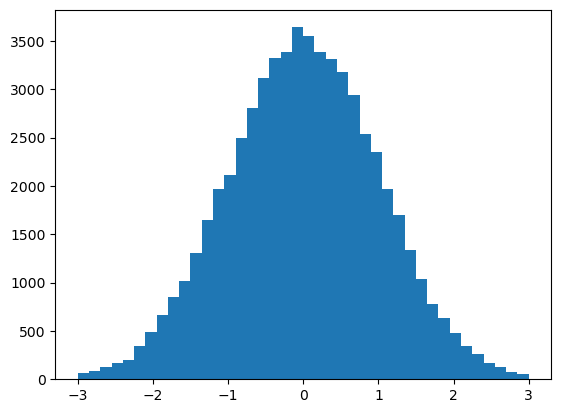

In [10]:
# Metropolis-Hastings algorithm to get a normally distributed data 
# from the Markov chain proposal having uniform disribution
def gaussian_approx(repeats, mu, sigma):
    states = []
    current_state = random.uniform(-3*sigma + mu,3*sigma + mu)
    for i in range(repeats):
        current = current_state
        states.append(current_state)
        next_state = random.uniform(-3*sigma+mu,3*sigma+mu)
        stay_prob = normal_distr(current_state, mu, sigma)
        jump_prob = normal_distr(next_state, mu, sigma)
        
        acceptance = min(jump_prob/stay_prob, 1)
        if accepted_prob(acceptance):
            current_state = next_state
    return states[int(repeats*0.4):]
    
dist = gaussian_approx(100000, 0, 1)
plt.hist(dist, bins=40) 
plt.show()